In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,InputLayer,Dropout,Conv1D,Conv2D,MaxPool2D,AvgPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from glob import glob
import cv2


In [ ]:

#upload images in google drive and use it here
#We can do it by clicking files icon leftside of the colab page .Then click mount drive option 

In [104]:
#Data import and augmentation
imageDataGenerator_Train=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2,rescale=1.0/255,rotation_range=2)
imageDataGenerator_Test=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2,rescale=1.0/255,rotation_range=2)



train_data=imageDataGenerator_Train.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/images/train',target_size=(128,128),class_mode='categorical',batch_size=30)
test_data=imageDataGenerator_Test.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/images/test',target_size=(128,128),batch_size=30,class_mode='categorical')


Found 619 images belonging to 3 classes.
Found 129 images belonging to 3 classes.


In [4]:
print(test_data.samples/len(test_data.class_indices))
print(test_data.filenames[0:5])
a,b=next(test_data)
print('a:',a.shape)
print('b:',b.shape)

43.0
['men_jeans/men_jeans410.jpg', 'men_jeans/men_jeans411.jpg', 'men_jeans/men_jeans412.jpg', 'men_jeans/men_jeans413.jpg', 'men_jeans/men_jeans414.jpg']
a: (30, 128, 128, 3)
b: (30, 3)


In [11]:
model=Sequential()
model.add(Conv2D(50,(10,10),activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(100,(10,10),activation='relu'))
model.add(Conv2D(150,(10,10),activation='relu'))
#model.add(Conv2D(200,(10,10),activation='relu'))
#model.add(Conv2D(250,(10,10),activation='relu'))
model.add(MaxPool2D((4,4)))
#model.add(MaxPool2D((4,4),padding='same'))
#model.add(MaxPool2D((4,4),padding='same'))
#model.add(MaxPool2D((4,4),padding='same'))
#model.add(MaxPool2D((4,4),padding='same'))
model.add(Flatten())

model.add(Dense(100,activation='relu'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 119, 119, 50)      15050     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 110, 110, 100)     500100    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 101, 101, 150)     1500150   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 150)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 93750)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               9375100   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [6]:
train_data.class_indices

{'men_jeans': 0, 'men_trousers': 1, 'saree': 2}

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit_generator(train_data,epochs=50,validation_data=test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
21/21 [==============================] - 5s 239ms/step - loss: 0.1988 - accuracy: 0.9111 - val_loss: 0.5045 - val_accuracy: 0.8527
Epoch 2/50
21/21 [==============================] - 5s 239ms/step - loss: 0.1868 - accuracy: 0.9257 - val_loss: 0.4172 - val_accuracy: 0.8682
Epoch 3/50
21/21 [==============================] - 5s 240ms/step - loss: 0.1641 - accuracy: 0.9338 - val_loss: 0.4720 - val_accuracy: 0.8527
Epoch 4/50
21/21 [==============================] - 5s 242ms/step - loss: 0.1375 - accuracy: 0.9435 - val_loss: 0.4771 - val_accuracy: 0.8217
Epoch 5/50
21/21 [==============================] - 5s 242ms/step - loss: 0.1830 - accuracy: 0.9338 - val_loss: 0.4083 - val_accuracy: 0.8605
Epoch 6/50
21/21 [==============================] - 5s 241ms/step - loss: 0.1774 - accuracy: 0.9321 - val_loss: 0.4003 - val_accuracy: 0.8062
Epoch 7/50
21/21 [==============================] - 5s 241ms/step - loss: 0.1475 - accuracy: 0.9435 - val_loss: 0.3819 - val_accuracy: 0.8527
Epoch 

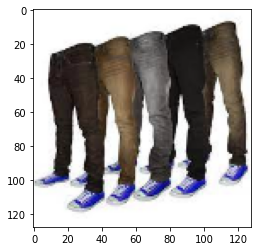

[0]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [155]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/jeans1.jpg')
img = cv2.resize(img,(128,128))

plt.imshow(img)
plt.show()

img = np.reshape(img,[1,128,128,3])

classes = model.predict_classes(img)
print(classes)

In [156]:
#Above cnn model has descent validation accuracy that is 88%
#Lets use transfer learning VGG16 . Already trained with imagenet dataset of image size 224x224

#Data import and augmentation
imageDataGenerator_Train=ImageDataGenerator(horizontal_flip=True,shear_range=0.2,rescale=1.0/255,rotation_range=2)
imageDataGenerator_Test=ImageDataGenerator(horizontal_flip=True,shear_range=0.2,rescale=1.0/255,rotation_range=2)


train_data=imageDataGenerator_Train.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/images/train',target_size=(224,224),class_mode='categorical',batch_size=30)
test_data=imageDataGenerator_Test.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/images/test',target_size=(224,224),batch_size=30,class_mode='categorical')


vgg16=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))
vgg16.summary()

Found 619 images belonging to 3 classes.
Found 129 images belonging to 3 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________

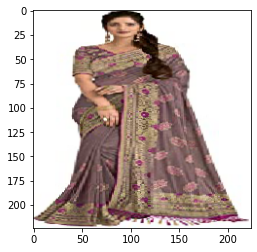

In [157]:
a,b=next(train_data)
plt.imshow(a[16])
plt.show()

In [158]:
# don't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

In [159]:
vgg16.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [160]:
#helpful to find number of classes
folder=glob('/content/drive/MyDrive/images/train/*')

x=Flatten()(vgg16.output)

#our layer ,we can add more as we want
#x=Dense(1000,activation='relu')(x)
#x=Dense(100,activation='relu')(x)
prediction=Dense(3,activation='softmax')(x)
#create a model object
model2=Model(inputs=vgg16.input,outputs=prediction)
#model summary
model2.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [161]:
# tell the model what cost and optimization method to use
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [162]:
model2.fit_generator(train_data,validation_data=test_data,epochs=10,steps_per_epoch=len(train_data),validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
21/21 [==============================] - 11s 477ms/step - loss: 0.5979 - accuracy: 0.7207 - val_loss: 0.5229 - val_accuracy: 0.7132
Epoch 2/10
21/21 [==============================] - 9s 446ms/step - loss: 0.2271 - accuracy: 0.8954 - val_loss: 0.2355 - val_accuracy: 0.8915
Epoch 3/10
21/21 [==============================] - 9s 448ms/step - loss: 0.1396 - accuracy: 0.9416 - val_loss: 0.2128 - val_accuracy: 0.9070
Epoch 4/10
21/21 [==============================] - 9s 447ms/step - loss: 0.1185 - accuracy: 0.9462 - val_loss: 0.2470 - val_accuracy: 0.8837
Epoch 5/10
21/21 [==============================] - 10s 492ms/step - loss: 0.0687 - accuracy: 0.9797 - val_loss: 0.1630 - val_accuracy: 0.9225
Epoch 6/10
21/21 [==============================] - 10s 468ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.1671 - val_accuracy: 0.9380
Epoch 7/10
21/21 [==============================] - 9s 452ms/step - loss: 0.0375 - accuracy: 0.9942 - val_loss: 0.1924 - val_accuracy: 0.9147
Epo

In [166]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/saree3.jpg')
img = cv2.resize(img,(224,224))

plt.imshow(img)
plt.show()

img = np.reshape(img,[1,224,224,3])

val = model2.predict(img)
print(val)

[[0. 0. 1.]]


In [167]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/jeans2.jpg')
img = cv2.resize(img,(224,224))

plt.imshow(img)
plt.show()

img = np.reshape(img,[1,224,224,3])

val = model2.predict(img)
print(val)

[[3.3035779e-25 1.9951763e-20 1.0000000e+00]]


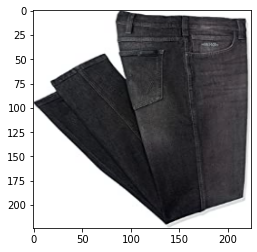

[[7.8672598e-15 8.0496906e-35 1.0000000e+00]]


In [165]:

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/men_jeans156.jpg')
img = cv2.resize(img,(224,224))

plt.imshow(img)
plt.show()

img = np.reshape(img,[1,224,224,3])

val = model2.predict(img)
print(val)

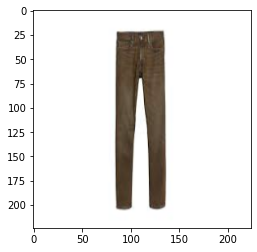

[[0.0000000e+00 1.0000000e+00 1.5307328e-23]]


In [170]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/jeans3.jpg')
img = cv2.resize(img,(224,224))

plt.imshow(img)
plt.show()

img = np.reshape(img,[1,224,224,3])

val = model2.predict(img)
print(val)

In [1]:
#Now model has good accuracy of 0.94 .Lets save the model
model2.save('/content/drive/MyDrive/Colab Notebooks/cnn_image_classification_244_final.h5')

NameError: ignored